<a href="https://colab.research.google.com/github/Aveiro11/To-work/blob/master/Adib_Wahid_Quader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [402]:
traind=pd.read_csv("train.csv")
testd=pd.read_csv("test.csv")

In [403]:
traind.shape

(6000, 8)

In [404]:
traind.head()

,ID,col_0,col_1,col_2,col_3,col_4,col_5,y
0,1,A1,0.423913,310.7,-1.302803,0.889328,1737,C3
1,2,A0,0.586957,310.1,0.021376,0.640316,1483,C1
2,3,A0,0.934783,313.3,-0.570492,0.636364,1507,C1
3,4,A1,0.402174,308.6,-0.921600,0.387352,1648,C1
4,5,A2,0.532609,311.4,-0.389922,0.557312,1506,C1


In [405]:
traind.columns

Index(['ID', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'y'], dtype='object')

In [406]:
traind['y'].unique()

array(['C3', 'C1', 'C2', 'C6', 'C4', 'C5'], dtype=object)

In [407]:
traind.groupby('y').median()

<ipython-input-407-c3846eda04ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traind.groupby('y').median()


,ID,col_1,col_2,col_3,col_4,col_5
y,,,,,,
C1,2998.0,0.521739,310.1,-0.008719,0.418972,1507.0
C2,2408.0,0.565217,310.2,2.378818,0.363636,1386.0
C3,2313.0,0.554348,310.5,-0.249478,0.857708,1530.0
C4,3511.0,0.489130,310.0,1.626443,0.822134,1367.0
C5,2480.0,0.586957,311.0,0.643340,0.375494,1438.0
C6,3370.0,0.782609,310.7,1.185050,0.434783,1349.0


In [408]:
X=traind.drop(columns=['y','ID'],axis=1)
Y=traind['y']

# standardization

In [409]:
#As col_0 has categorical values i had to convert it
labels,counts = pd.factorize(X['col_0'])
X['col_0'] = labels

In [410]:
#standardization of features
scaler=StandardScaler()
scaler.fit(X[['col_0','col_1',	'col_2',	'col_3',	'col_4',	'col_5']])

StandardScaler()

In [411]:
stand_data=scaler.transform(X[['col_0','col_1',	'col_2',	'col_3',	'col_4',	'col_5']])

In [412]:
print(Y)

0       C3
1       C1
2       C1
3       C1
4       C1
        ..
5995    C1
5996    C1
5997    C2
5998    C1
5999    C1
Name: y, Length: 6000, dtype: object


In [413]:
X=stand_data

# Classifier Training

In [414]:
X_train=X
Y_train=Y
X_test=pd.read_csv("test.csv")
X_testp=X_test.drop(columns=['ID'],axis=1)
#Since col_0 of test dataset provided holds categorical values, i had to convert it
labels,counts = pd.factorize(X_test['col_0'])
X_testp['col_0'] = labels
#standardization of test dataset
scaler.fit(X_testp[['col_0','col_1',	'col_2',	'col_3',	'col_4',	'col_5']])

StandardScaler()

In [415]:
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [416]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

# Predicting Values

In [417]:
X_trainp=classifier.predict(X_train)
train_data_acc=accuracy_score(X_trainp,Y_train)

# All the Performance Matrices

In [418]:
print(train_data_acc)

1.0


In [419]:
f1 = f1_score(Y_train, X_trainp, average='weighted')
precision = precision_score(Y_train, X_trainp, average='weighted')
recall = recall_score(Y_train, X_trainp, average='weighted')
# Printing the scores
print("F1 Score:", f1)
print("Precision :", precision)
print("Recall:", recall)

F1 Score: 1.0
Precision : 1.0
Recall: 1.0


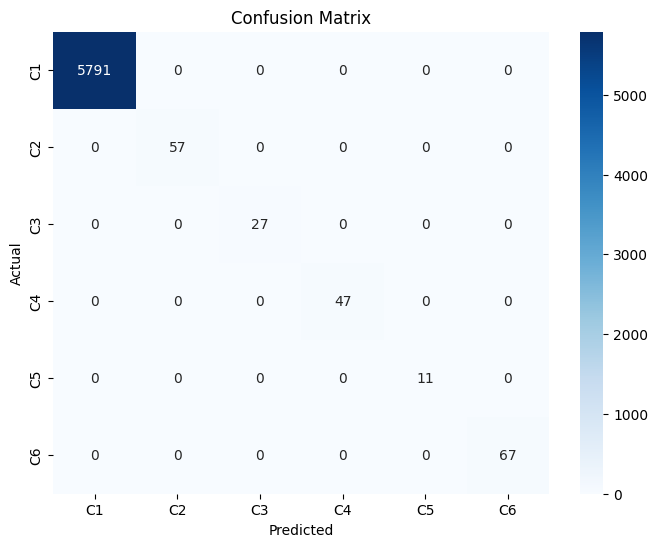

In [420]:
conf_matrix = confusion_matrix(Y_train, X_trainp)


class_labels = np.unique(np.concatenate((Y_train, X_trainp)))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Creating New CSV for predicted y labels

In [421]:
X_testp2=classifier.predict(X_testp)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [422]:
X_test['y'] = X_testp2
Test=X_test[['ID', 'y']]

In [423]:
sampled=pd.read_csv("sample_solutions.csv")

In [424]:
sampled.shape


(4000, 2)

In [425]:
Test.shape

(4000, 2)

In [426]:
Test.to_csv('/content/Adib_Wahid_Quader.csv', index=False)